- Ricardo Méndez 21289
- Sara Echeverría 21371
- Sebastián Juárez 21471

In [71]:
import matplotlib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('ggplot')

import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [72]:
df = pd.read_csv('data/movies.csv', encoding='latin1')
df.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


## 1. Resumen del conjunto de datos.

##### El conjunto de datos proporcionado contiene información sobre películas, incluyendo características como el presupuesto, ingresos, duración, género, fecha de lanzamiento, votos, actores, entre otros. Aproximadamente la mitad de las variables encontradas son cualitativas y la otra mitad cuantitativas.

In [73]:
df.describe()

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,249876.829300,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600
std,257380.109004,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


## 2. Clasificación de Variables

#### Cuantitativas

##### Continuas: Popularity, Budget, Revenue, Runtime, voteAvg, actorsPopularity
##### Discretas: Id, genresAmount, productionCoAmount, productionCountriesAmount, voteCount, actorsAmount, castWomenAmount, castMenAmount

#### Cualitativas

##### Nominales: Original_title, originalLanguage, Title, homePage, Video, Director, Genres, productionCompany, productionCompanyCountry, productionCountry, releaseDate, Actors, actorsCharacter.
##### Ordinales: No se encontraron 

## 3. Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta)

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


popularity: Estadística=0.1112, p-valor=0.0000
La variable popularity no sigue una distribución normal.
budget: Estadística=0.5684, p-valor=0.0000
La variable budget no sigue una distribución normal.
revenue: Estadística=0.4143, p-valor=0.0000
La variable revenue no sigue una distribución normal.
runtime: Estadística=0.8531, p-valor=0.0000
La variable runtime no sigue una distribución normal.
voteAvg: Estadística=0.9796, p-valor=0.0000
La variable voteAvg no sigue una distribución normal.


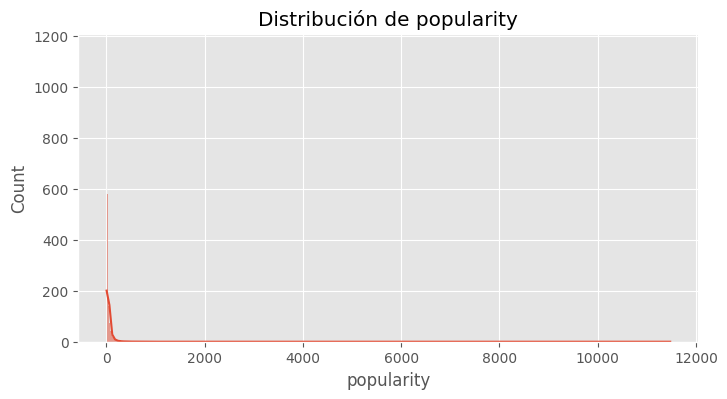

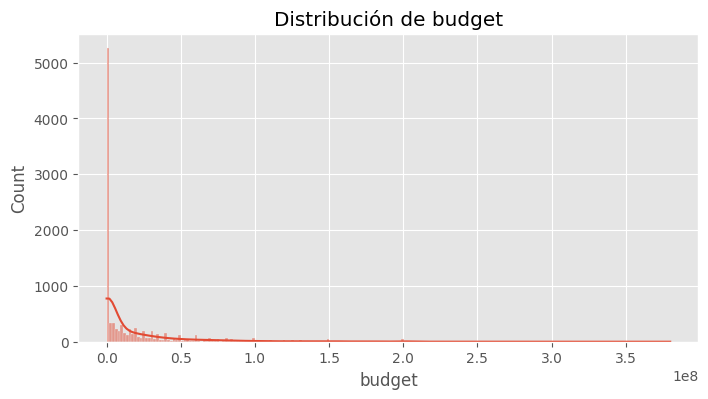

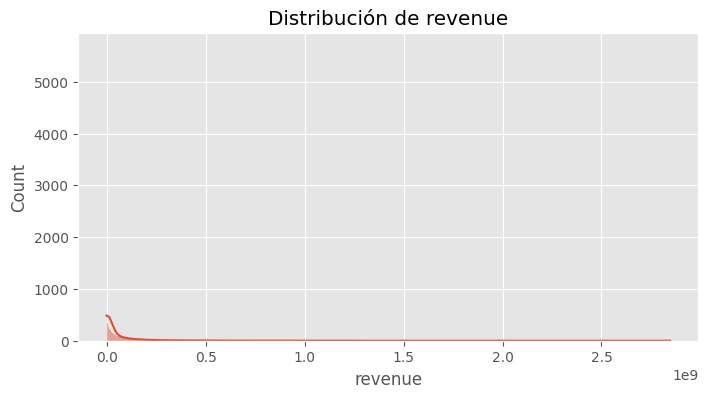

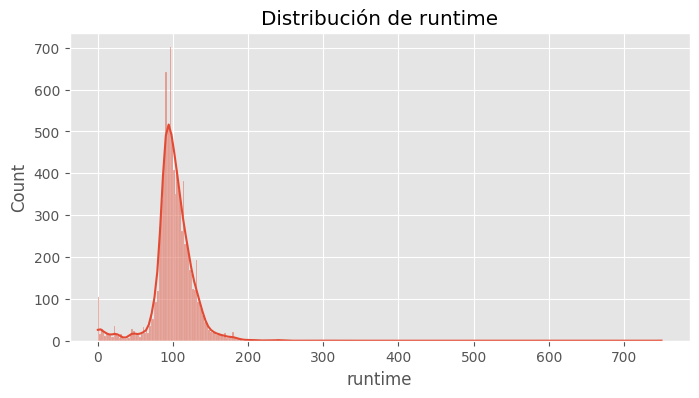

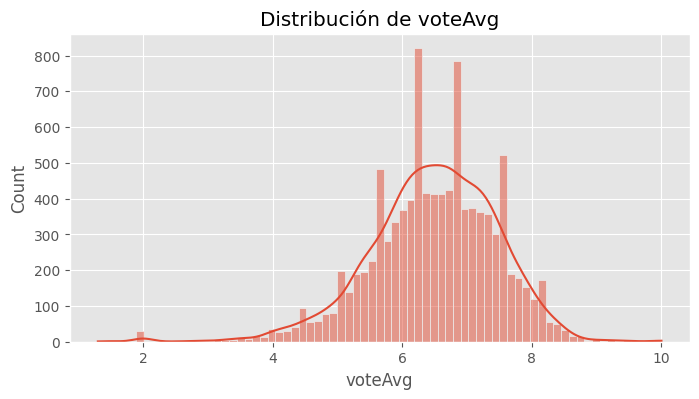

In [74]:
from scipy.stats import shapiro



cuant_vars = ['popularity', 'budget', 'revenue', 'runtime', 'voteAvg']


for x in cuant_vars:
    stat, p_value = shapiro(df[x])
    print(f'{x}: Estadística={stat:.4f}, p-valor={p_value:.4f}')
    if p_value > 0.05:
        print(f'La variable {x} parece seguir una distribución normal.')
    else:
        print(f'La variable {x} no sigue una distribución normal.')

cualitativas = ['originalTitle', 'originalLanguage', 'title', 'homePage', 'video', 'director', 'genres', 
                'productionCompany', 'productionCompanyCountry', 'productionCountry', 'releaseDate', 'actors', 'actorsCharacter']


for variable in cuant_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribución de {variable}')
    plt.show()

In [75]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para actorsCharacter:
actorsCharacter
||||                                                                                                                                                                                                                                                                                                                                                                                                                                     17
|||||                                                                                                                                                                                                                                                                                                                                                                                                                                    16
||||||                                                                               

In [76]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para actors:
actors
FALSE                                                                                                                                                                                                                                                                                                                                                                                                                       480
TRUE                                                                                                                                                                                                                                                                                                                                                                                                                          6
Kim Nam-joon|Kim Seok-jin|Min Yoon-gi|Jung Ho-seok|Park Ji-min|Kim Tae-hyung|Jeon Jung-kook                                    

In [77]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para releaseDate:
releaseDate
2021-10-08    15
2021-02-12    15
2021-10-01    14
2021-11-12    12
2019-11-08    11
              ..
2006-10-21     1
1948-05-27     1
1998-08-04     1
2008-08-29     1
2021-10-31     1
Name: count, Length: 5568, dtype: int64


In [78]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para productionCountry:
productionCountry
United States of America                                4971
Japan                                                    613
United Kingdom|United States of America                  339
United Kingdom                                           294
Canada|United States of America                          223
                                                        ... 
United States of America|Norway|Sweden                     1
Mexico|Taiwan|United States of America                     1
Canada|China|Japan|United States of America                1
China|Canada|United States of America|United Kingdom       1
Ecuador                                                    1
Name: count, Length: 879, dtype: int64


In [79]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para productionCompanyCountry:
productionCompanyCountry
US                       997
US|US                    792
US|US|US                 452
|US                      292
US|                      265
                        ... 
|FR||BE|FR||FR|FR|FR       1
GB|DK||SE|DK|GB|IE|IE      1
FR|FR||FR|CA|BE            1
US|JP|KR|JP                1
CO|CO                      1
Name: count, Length: 2354, dtype: int64


In [80]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para productionCompany:
productionCompany
Paramount                                                                                                  55
Universal Pictures                                                                                         50
Warner Bros. Pictures                                                                                      37
Toei Animation                                                                                             34
DreamWorks Animation                                                                                       33
                                                                                                           ..
PSC|Toho                                                                                                    1
Martini Films|Paramount Famous Productions|Pure Pictures Entertainment|North by Northwest Entertainment     1
DreamWorks Home Entertainment                            

In [81]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para genres:
genres
Drama                                  521
Comedy                                 440
Horror                                 230
Drama|Romance                          211
Horror|Thriller                        205
                                      ... 
Animation|Horror|Action|Comedy           1
Science Fiction|Comedy|Adventure         1
War|Action|Adventure|Drama|Thriller      1
Horror|Comedy|Fantasy|Thriller           1
Documentary|Animation|History            1
Name: count, Length: 2345, dtype: int64


In [82]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para director:
director
Steven Spielberg                                                                                                     29
Clint Eastwood                                                                                                       28
Ridley Scott                                                                                                         23
Martin Scorsese                                                                                                      19
Kunihiko Yuyama                                                                                                      19
                                                                                                                     ..
Kevin Farley                                                                                                          1
Jürgen Brüning|Kristian Petersen|Todd Verow|Maria Beatty|Bruce LaBruce|Courtney Trouble|Manuela Kay|Émilie Jouvet  

In [83]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para video:
video
False    9430
True       84
Name: count, dtype: int64


In [84]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para homePage:
homePage
http://www.naruto-movie.com/                          6
http://www.thehungergames.movie/                      4
http://www.p3m.jp/                                    3
http://www.kungfupanda.com/                           3
http://kizumonogatari-usa.com/                        3
                                                     ..
http://www.lemonademouth.com                          1
http://warnervideo.com/greenlanternemeraldknights/    1
http://www.loversguide.com/                           1
http://dragontattoo.com/                              1
https://www.netflix.com/title/81425229                1
Name: count, Length: 4125, dtype: int64


In [85]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para title:
title
Pinocchio        4
Cinderella       4
Carrie           3
The Courier      3
Awake            3
                ..
Blind Horizon    1
Chasing Papi     1
The Eye 2        1
An Education     1
Row 19           1
Name: count, Length: 9697, dtype: int64


In [86]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para originalLanguage:
originalLanguage
en    7772
ja     644
es     425
fr     271
ko     167
zh     119
it     100
de      84
cn      80
ru      67
pt      43
no      28
sv      27
hi      27
da      27
nl      18
th      17
pl      15
id      12
tr      10
fi       8
tl       5
te       5
sr       4
is       4
fa       3
ro       2
cs       2
el       2
uk       2
ms       1
ml       1
ta       1
la       1
he       1
ar       1
eu       1
bn       1
nb       1
ca       1
Name: count, dtype: int64


In [87]:
var = cualitativas.pop()
frecuencia = df[var].value_counts()
print(f'\nTabla de frecuencia para {var}:\n{frecuencia}')


Tabla de frecuencia para originalTitle:
originalTitle
Pinocchio                                                4
Great Expectations                                       3
Escape Room                                              3
The Courier                                              3
Alice in Wonderland                                      3
                                                        ..
Into the Sun                                             1
The Land Before Time X: The Great Longneck Migration     1
The Land Before Time XI: Invasion of the Tinysauruses    1
Dug's Special Mission                                    1
Row 19                                                   1
Name: count, Length: 9760, dtype: int64


## Resultados

#### De las variables cuantitativas ninguna superó el test de shapiro, el cual indica si una variable sigue una distribución normal o no. A pesar de ello, la variable vote_Avg muestra una forma similar a una distribución normal.

#### En cuanto a las variables cualitativas, sus frecuencias indican que, en la mayoría de casos, se encuentra un valor dominante. Para el resto de valores siempre se encuentran frecuencias muy diminutas en comparación.

# ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [88]:
budget_10 = df.sort_values(by='budget', ascending=False)
top_10 = budget_10.head(10)[['title', 'budget']]
print(top_10)

                                            title     budget
716   Pirates of the Caribbean: On Stranger Tides  380000000
4710                      Avengers: Age of Ultron  365000000
5952                            Avengers: Endgame  356000000
4953                               Justice League  300000000
5953                       Avengers: Infinity War  300000000
163      Pirates of the Caribbean: At World's End  300000000
607                              Superman Returns  270000000
7134                                The Lion King  260000000
3791                                      Tangled  260000000
280                                  Spider-Man 3  258000000


# ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [89]:
rev_10 = df.sort_values(by='revenue', ascending=False)
top_10 = budget_10.head(10)[['title', 'revenue']]
print(top_10)

                                            title       revenue
716   Pirates of the Caribbean: On Stranger Tides  1.045714e+09
4710                      Avengers: Age of Ultron  1.405404e+09
5952                            Avengers: Endgame  2.797801e+09
4953                               Justice League  6.579243e+08
5953                       Avengers: Infinity War  2.046240e+09
163      Pirates of the Caribbean: At World's End  9.610000e+08
607                              Superman Returns  3.910812e+08
7134                                The Lion King  1.667635e+09
3791                                      Tangled  5.924617e+08
280                                  Spider-Man 3  8.908716e+08


# ¿Cuál es la película que más votos tuvo?

In [90]:
budget_10 = df.sort_values(by='voteCount', ascending=False)
top_10 = budget_10.head(1)[['title', 'voteCount']]
print(top_10)

          title  voteCount
3511  Inception      30788


# ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

# ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras

# ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico

# ¿Las películas de qué género principal obtuvieron mayores ganancias ?

# ¿La cantidad de actores influye en los ingresos de las películas? ¿Se han hecho películas con más actores en los últimos años?

# ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

# ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [91]:
sorted_df = df.sort_values(by='voteAvg', ascending=False)

top_20_movies = sorted_df.head(20)

directors = top_20_movies['director']

for index, row in df.iterrows():
    print(f"Pelicula: {row['originalTitle']}, Director/es: {row['director']}")


Pelicula: Four Rooms, Director/es: Allison Anders|Alexandre Rockwell|Robert Rodriguez|Quentin Tarantino
Pelicula: Judgment Night, Director/es: Stephen Hopkins
Pelicula: Star Wars, Director/es: George Lucas
Pelicula: Finding Nemo, Director/es: Andrew Stanton
Pelicula: Forrest Gump, Director/es: Robert Zemeckis
Pelicula: American Beauty, Director/es: Sam Mendes
Pelicula: Citizen Kane, Director/es: Orson Welles
Pelicula: Dancer in the Dark, Director/es: Lars von Trier
Pelicula: The Fifth Element, Director/es: Luc Besson
Pelicula: Metropolis, Director/es: Fritz Lang
Pelicula: Pirates of the Caribbean: The Curse of the Black Pearl, Director/es: Gore Verbinski
Pelicula: Kill Bill: Vol. 1, Director/es: Quentin Tarantino
Pelicula: Jarhead, Director/es: Sam Mendes
Pelicula: 9 Songs, Director/es: Michael Winterbottom
Pelicula: Apocalypse Now, Director/es: Francis Ford Coppola
Pelicula: Unforgiven, Director/es: Clint Eastwood
Pelicula: The Simpsons Movie, Director/es: David Silverman
Pelicula: Et

# ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión

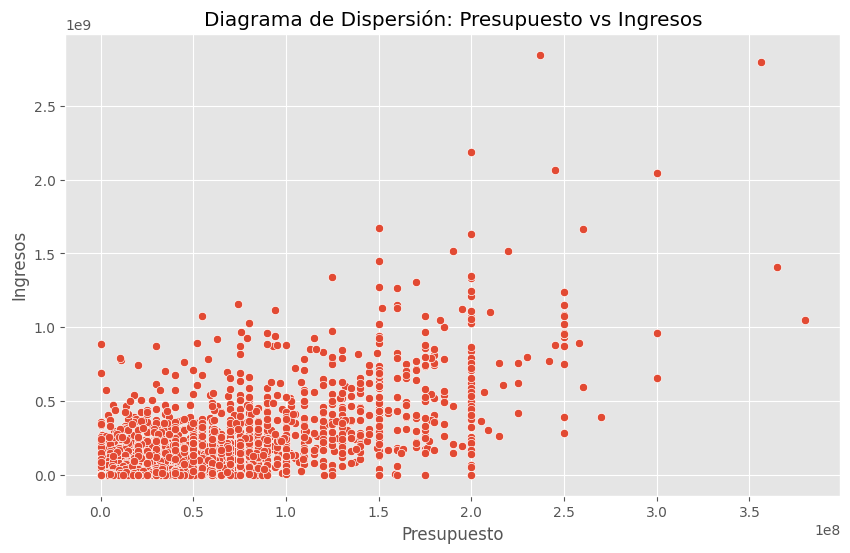

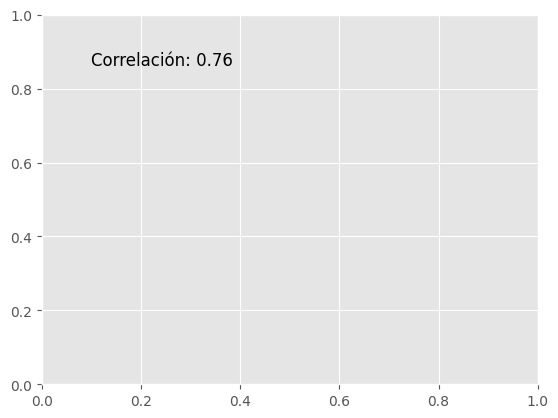

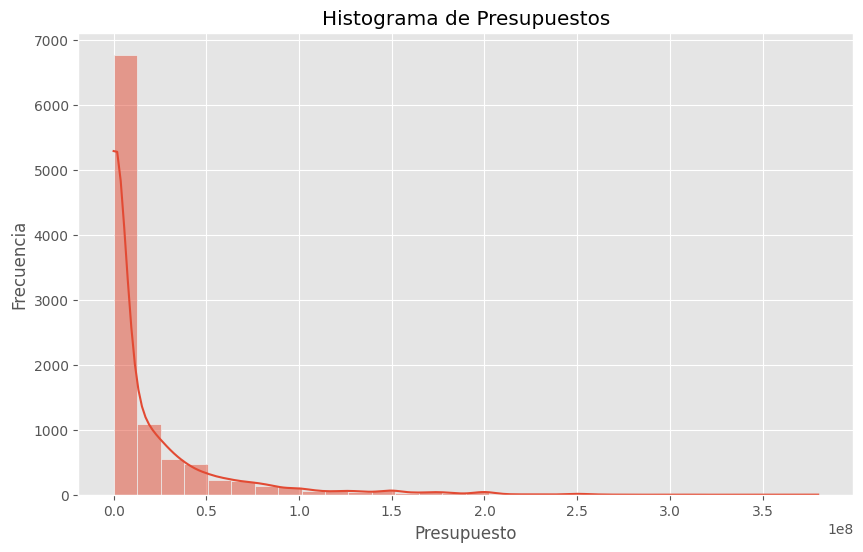

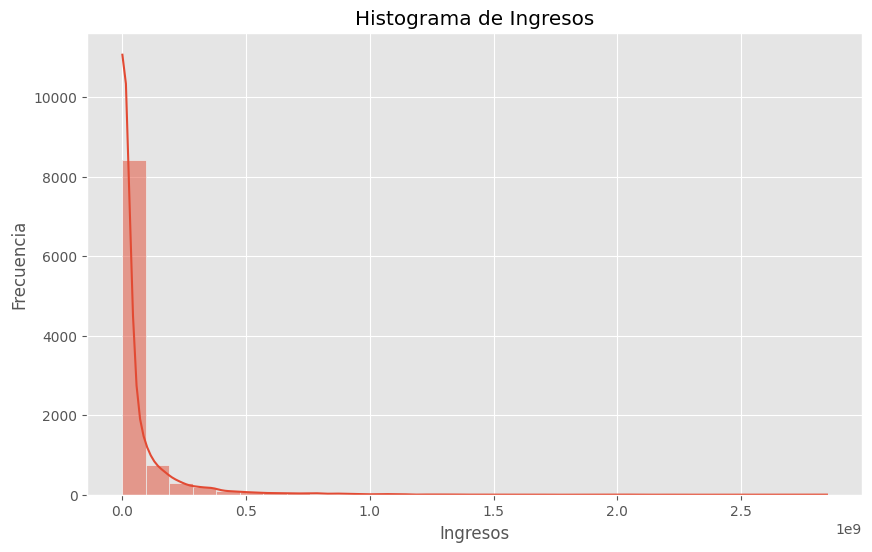

In [92]:
# Diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Diagrama de Dispersión: Presupuesto vs Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

correlation = df['budget'].corr(df['revenue'])
plt.text(0.1, 0.9, f'Correlación: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Histograma de presupuestos
plt.figure(figsize=(10, 6))
sns.histplot(df['budget'], bins=30, kde=True)
plt.title('Histograma de Presupuestos')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de ingresos
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], bins=30, kde=True)
plt.title('Histograma de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

### Histograma de presupuestos vs ingresos
En el primer grafico de presupuestos vs ingresos, podemos ver que realmente hay una relacion lineal, aunque no muy fuerte, ya que los puntos estan dipersos y no muestran un patron claro. Pero luego podemos calcular la correlación de estas dos variables, que es lo que se puede ver luego del primer grafico, y vemos que tiene un valor cercano a 1, lo que indicaría una correlación positiva fuerte o que los altos presupuestos están asociados con altos ingresos. A pesar de todo esto, hay varios valores que pueden afectar el resultado final, por lo que no se puede tomar este valor como absoluto.

### Histograma de presupuestos
Cada barra en el histograma muestra cuántas películas tienen un presupuesto que cae dentro del rango especificado por esa barra. Ya que la distribución es sesgada hacia la izquierda, los datos nos indican que la mayoría de las películas tienen presupuestos más bajos.

### Histograma de ingresos
Similar al histograma de presupuestos, cada barra muestra cuántas películas tienen ingresos que caen dentro del rango especificado por esa barra. Ya que este igualmente tiene un sesgo hacia la izquierda, los datos nos indican que la mayoría de las películas tienen ingresos más bajos.

# ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

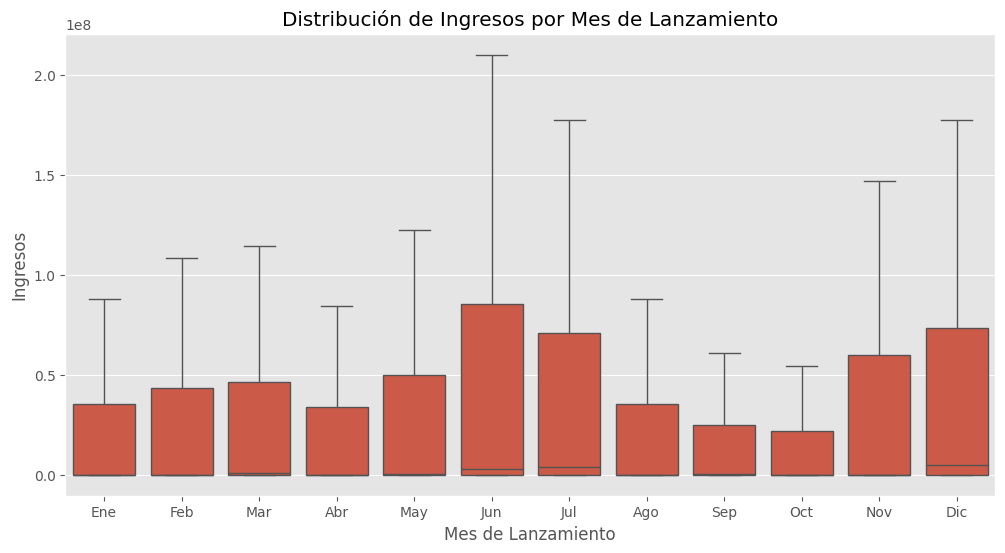

C:\Users\sebas\AppData\Local\Temp\ipykernel_33712\2907418226.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_by_month.index, y=avg_revenue_by_month.values, palette='viridis')


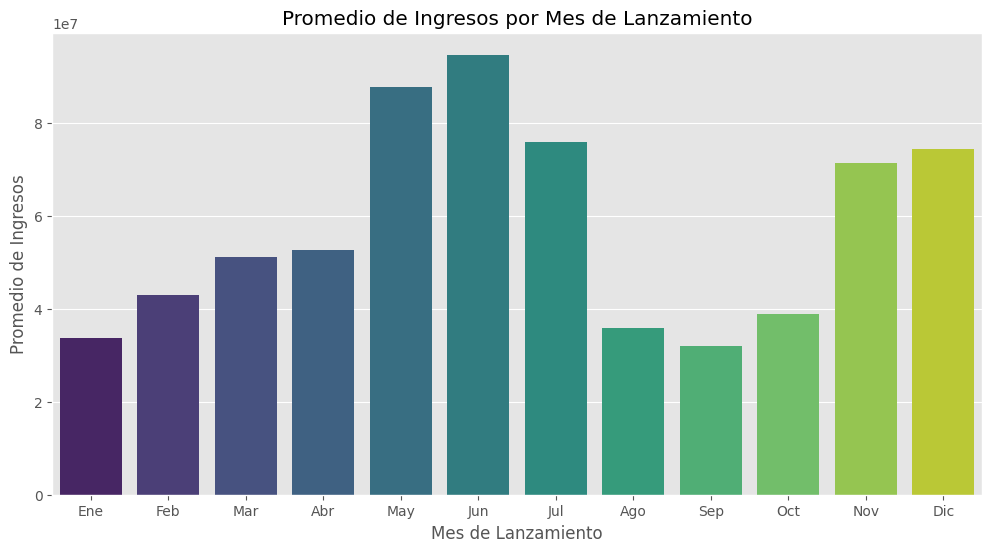

In [93]:

df['releaseMonth'] = pd.to_datetime(df['releaseDate']).dt.month

# Caja y bigotes de ingresos según el mes de lanzamiento
plt.figure(figsize=(12, 6))
sns.boxplot(x='releaseMonth', y='revenue', data=df, showfliers=False)
plt.title('Distribución de Ingresos por Mes de Lanzamiento')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Ingresos')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Gráfico de barras para el promedio de ingresos por mes
avg_revenue_by_month = df.groupby('releaseMonth')['revenue'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_revenue_by_month.index, y=avg_revenue_by_month.values, palette='viridis')
plt.title('Promedio de Ingresos por Mes de Lanzamiento')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Promedio de Ingresos')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

### Distribución de Ingresos por Mes de Lanzamiento
En este grafico podemos ver si es que hay alguna variacion entre los datos de ingresos y si estos tienen algunos datos atipicos por el mes de lanzamiento. Ademas, viendo las lineas dentro de las cajas podemos ver las medianas de estos y ver como es que esto puede variar.

### Promedio de Ingresos por Mes de Lanzamiento
En este grafico de barras se muestra el promedio de ingresos para cada mes. En este grafico podemos ver de mejor manera como es que se distibuyen los ingresos por mes. Segun los datos que se nos proporcionaron, podemos ver que en mayo se han presentado los ingresos mas altos, por lo que podemos pensar que si se puede asociar los meses a unos mejores ingresos. Un dato importante es que no se puede ver que sea una distibucion normal en su totalidad ya que en el grafico de barras no se ve una campana gaussiana en su totalidad, pero esto no desmerita los demas datos.

# ¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuántas películas, en promedio, se han lanzado por mes?

C:\Users\sebas\AppData\Local\Temp\ipykernel_33712\2498588364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_by_month.index, y=avg_revenue_by_month.values, palette='viridis')


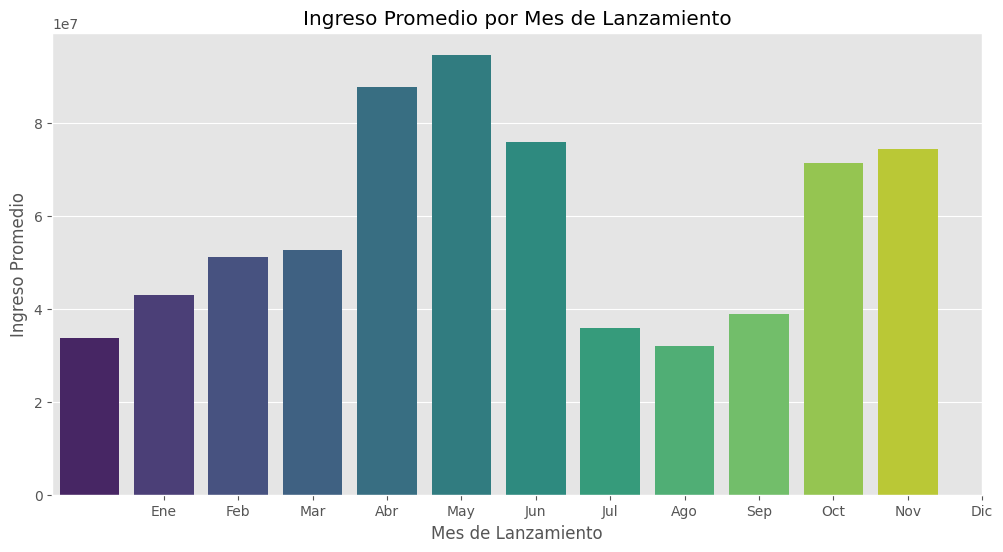

    Mes  Promedio de Películas
0     1              54.333333
1     2              58.833333
2     3              67.916667
3     4              58.000000
4     5              58.166667
5     6              68.250000
6     7              67.666667
7     8              76.083333
8     9              89.916667
9    10              89.000000
10   11              67.250000
11   12              77.916667


In [94]:
df['releaseMonth'] = pd.to_datetime(df['releaseDate']).dt.month

# Gráfico de barras para el ingreso promedio por mes
avg_revenue_by_month = df.groupby('releaseMonth')['revenue'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_revenue_by_month.index, y=avg_revenue_by_month.values, palette='viridis')
plt.title('Ingreso Promedio por Mes de Lanzamiento')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Ingreso Promedio')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Cálculo del promedio de películas lanzadas por mes
avg_movies_per_month = df['releaseMonth'].value_counts().sort_index() / 12
avg_movies_per_month = avg_movies_per_month.rename_axis('Mes').reset_index()
avg_movies_per_month.columns = ['Mes', 'Promedio de Películas']

print(avg_movies_per_month)

### Promedio de Ingresos por Mes de Lanzamiento
En este grafico de barras se muestra el promedio de ingresos para cada mes. En este grafico podemos ver de mejor manera como es que se distibuyen los ingresos por mes. Segun los datos que se nos proporcionaron, podemos ver que en mayo se han presentado los ingresos mas altos, por lo que podemos pensar que si se puede asociar los meses a unos mejores ingresos. Un dato importante es que no se puede ver que sea una distibucion normal en su totalidad ya que en el grafico de barras no se ve una campana gaussiana en su totalidad, pero esto no desmerita los demas datos.

### Peliculas lanzadas en promedio por mes

Podemos ver que cada mes ha tenido una cantidad algo parecida de lanzamientos pero los meses con mas lanzamientos son septiembre y octubre, minetras que los menores son enero y abril

# ¿Cómo se correlacionan las calificaciones con el éxito comercial?

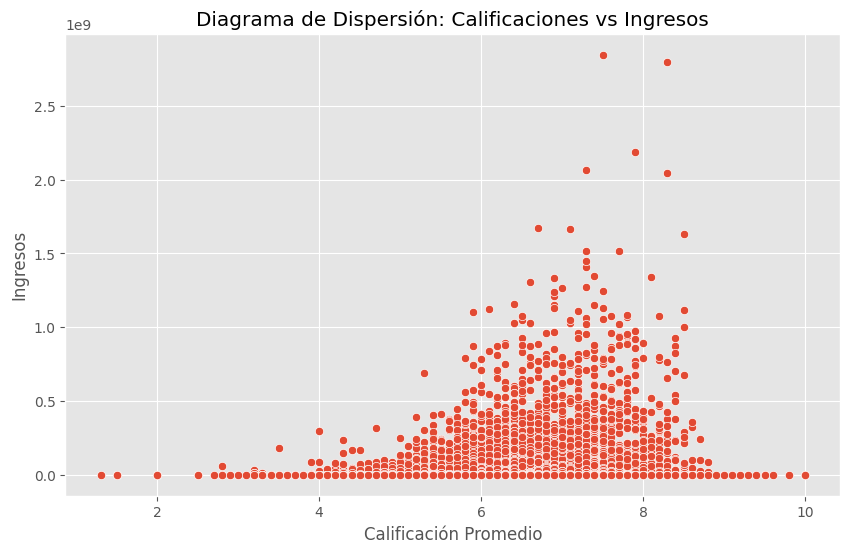

Coeficiente de correlación entre calificaciones y ingresos: 0.14


In [95]:
# Diagrama de dispersión entre las calificaciones y los ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='voteAvg', y='revenue', data=df)
plt.title('Diagrama de Dispersión: Calificaciones vs Ingresos')
plt.xlabel('Calificación Promedio')
plt.ylabel('Ingresos')
plt.show()
correlation = df['voteAvg'].corr(df['revenue'])
print(f"Coeficiente de correlación entre calificaciones y ingresos: {correlation:.2f}")

### Grafico de dispersión

Viendo el gráfico podemos ver que no hay una relacion entre las calificaciones de las personas y los ingresos que se reciben, y no solo lo podemos notar en el gráfico, esto tambien se puede ver el calculo del coeficiente de corelación. Para que se demuestre que hay una relacion lineal, el numero debe ser 1 o lo mas cercano posible a eso, pero el resultado que nos dio es 0.14, por lo que esta muy alejado a ser una relacion lineal

# ¿A qué género principal pertenecen las películas más largas?

C:\Users\sebas\AppData\Local\Temp\ipykernel_33712\2080101774.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_longest_duration.index, y=top_genres_longest_duration.values, palette='viridis')


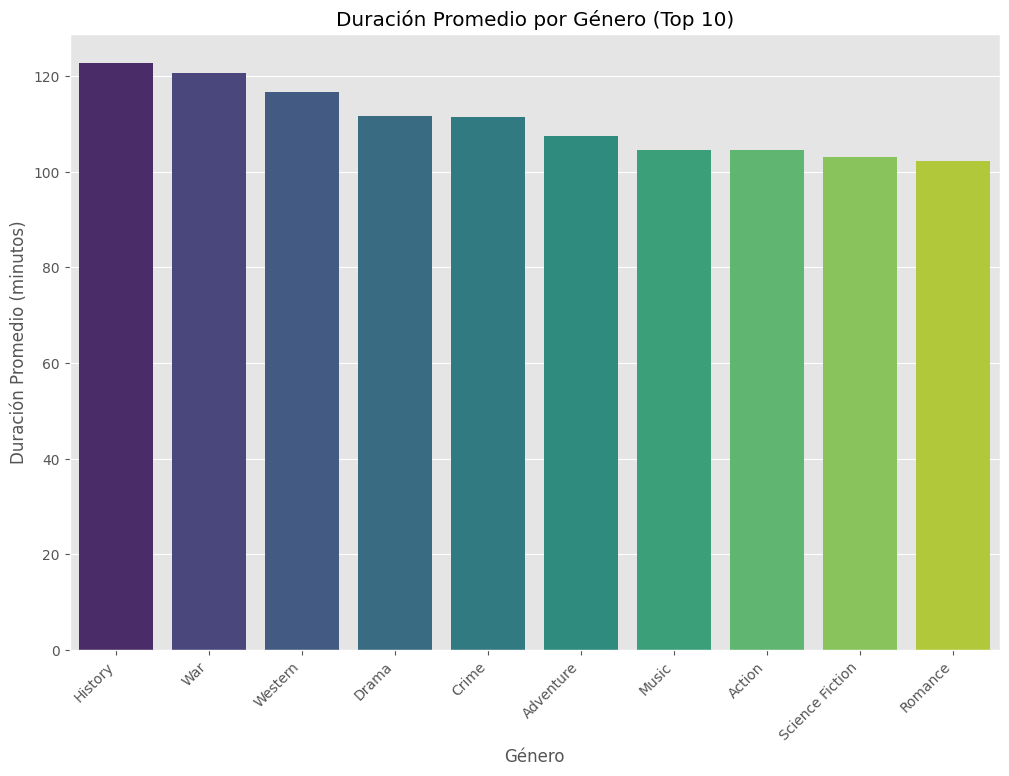

In [96]:
df['primary_genre'] = df['genres'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else np.nan)
top_genres_longest_duration = df.groupby('primary_genre')['runtime'].mean().nlargest(10)

# Gráfico de barras para visualizar la duración por género (Top 10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres_longest_duration.index, y=top_genres_longest_duration.values, palette='viridis')
plt.title('Duración Promedio por Género (Top 10)')
plt.xlabel('Género')
plt.ylabel('Duración Promedio (minutos)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mayor legibilidad
plt.show()

### Gafico de barras
Cada una de las peliculas, dentro del genero, se les adjundtaron de 3 a mas generos ya que no se les puede encapsular en una sola, pero al hacer algunas separaciones y cuentas, podemos ver que historia tiene las peliculas con las mayores duraciones, seguidas por guerra y por peliculas western